In [1]:
import pandas as pd
import numpy as np

pbc = pd.read_csv('dataset_prova/cas_sm_pubchem.csv').drop(columns = 'Unnamed: 0')
pbc

,cas,smiles,pubchem2d
0,10108-64-2,[Cl-].[Cl-].[Cd++],0000000000000000000000000000000000000110000000...
1,88-30-2,Oc1ccc(c(c1)C(F)(F)F)[N+]([O-])=O,1000000001100010001100011000000000000000000000...
2,1397-94-0,CCCCCC[C@@H]1[C@@H](OC(=O)CC(C)C)[C@H](C)OC(=O...,1111000001111011001111000000000000000000000000...
3,25474-41-3,NaN,NaN
4,540-72-7,[Na+].[S-]C#N,0000000000000010000000000010000001000000000000...
...,...,...,...
3196,14008-58-3,CCCCNC(=O)NC(=O)c1cccnc1,1100000001110011001100000000000000000000000000...
3197,53762-97-3,NaN,NaN
3198,52316-55-9,COC(=O)Nc1[nH]c2ccccc2n1.O[P](O)(O)=O,1100000001110011001110000000001000000000000000...
3199,499-83-2,OC(=O)c1cccc(n1)C(O)=O,1000000001100010001110000000000000000000000000...


Composti con Smiles senza pubchem2d oppure il viceversa.

In [3]:
sum(pbc.pubchem2d.isnull() == True)

481

Bisogna indagare quali sono i composti che condividono il pubchem2d.

I composti con pubchem2d uguale sono:

In [3]:
temp = pbc.pubchem2d.copy().dropna()
print(sum(temp.duplicated(keep = 'first')))

169


### Pubchem2d uguali

In [55]:
len(temp[temp.duplicated(keep = False)].unique())

132

In [2]:
temp = pbc.copy().dropna()
print(sum(temp.duplicated(subset = 'pubchem2d', keep = 'first')))
db_eq_pub = temp[temp.duplicated(subset = 'pubchem2d',keep = False)].sort_values(by = 'pubchem2d')

169


In [3]:
db_eq_pub = db_eq_pub.reset_index().drop(columns = 'index')
db_eq_pub

,cas,smiles,pubchem2d
0,7440-47-3,[Cr],0000000000000000000000000000000000000000000000...
1,18540-29-9,[Cr+6],0000000000000000000000000000000000000000000000...
2,1344-67-8,[Cl].[Cu++],0000000000000000000000000000000000000100000000...
3,7758-89-6,[Cl-].[Cu+],0000000000000000000000000000000000000100000000...
4,67-66-3,ClC(Cl)Cl,0000000000000000000000000000000000000110000000...
...,...,...,...
296,71751-41-2,CCC(C)[C@H]1O[C@@]2(C[C@@H]3C[C@@H](C\C=C(C)\[...,1111000001111100001111100000000000000000000000...
297,81103-11-9,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,1111000001111110001111000000000000000000000000...
298,114-07-8,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,1111000001111110001111000000000000000000000000...
299,4680-78-8,[Na+].CCN(Cc1cccc(c1)[S]([O-])(=O)=O)c2ccc(cc2...,1111000001111111001110000010000001100000000000...


### Rappresentazione composti uguali
Rappresento i composti che hanno pubchem2d uguali

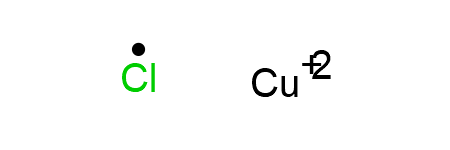

In [6]:
from rdkit.Chem import MolFromSmiles

m1 = MolFromSmiles(db_eq_pub['smiles'].loc[2])
m1

True


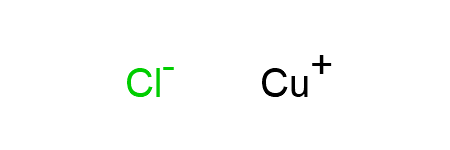

In [95]:
m2 = MolFromSmiles(db_eq_pub['smiles'].loc[3])
print(db_eq_pub['pubchem2d'].loc[2] == db_eq_pub['pubchem2d'].loc[3])
m2


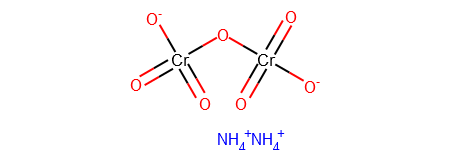

In [99]:
m1 = MolFromSmiles(db_eq_pub['smiles'].loc[99])
m1

True


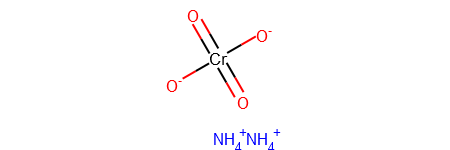

In [100]:
m2 = MolFromSmiles(db_eq_pub['smiles'].loc[100])
print(db_eq_pub['pubchem2d'].loc[100] == db_eq_pub['pubchem2d'].loc[99])
m2

In [13]:
from rdkit.ML.KNN.DistFunctions import TanimotoDist
# from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Fingerprints import FingerprintMols

m1 = FingerprintMols.FingerprintMol(MolFromSmiles(db_eq_pub['smiles'].loc[99]))
m2 = FingerprintMols.FingerprintMol(MolFromSmiles(db_eq_pub['smiles'].loc[100]))

print(TanimotoDist(m1,m2, range(64)))
# print(TanimotoSimilarity(m1,m2,range(64)))
print(db_eq_pub['smiles'].loc[100])
print(db_eq_pub['smiles'].loc[99])

0.7241379310344828
[NH4+].[NH4+].[O-][Cr]([O-])(=O)=O
[NH4+].[NH4+].[O-][Cr](=O)(=O)O[Cr]([O-])(=O)=O


## Distanze composti (Hamming distance)
### Uso i pubchem2d

In [2]:
from scipy.spatial.distance import pdist, squareform

pbc1 = pbc.pubchem2d[0].replace('', ' ').strip().split(' ')
pbc2 = pbc.pubchem2d[1].replace('', ' ').strip().split(' ')
a = np.array((pbc1,pbc2))

for i in range(2,len(pbc.pubchem2d)):
    try:
        p = pbc.pubchem2d[i].replace('', ' ').strip().split(' ')
        a = np.concatenate((a,[p]))
    except:
        continue


In [3]:
hamming_matrix = squareform(pdist(a, metric = 'hamming'))

In [5]:
hamming_matrix.shape

(2720, 2720)

La matrice hamming_matrix contiene le distanze (di Hamming) solo per i composti di cui si conosce il pubchem2d che sono 2720.

In [5]:
sum(pbc.pubchem2d.isnull() == False)

2720

In [4]:
hamming_matrix

array([[0.        , 0.13393871, 0.20090806, ..., 0.17139614, 0.15209989,
        0.02837684],
       [0.13393871, 0.        , 0.11464245, ..., 0.14869467, 0.10215664,
        0.13053348],
       [0.20090806, 0.11464245, 0.        , ..., 0.16345062, 0.10329171,
        0.1861521 ],
       ...,
       [0.17139614, 0.14869467, 0.16345062, ..., 0.        , 0.10556186,
        0.16572077],
       [0.15209989, 0.10215664, 0.10329171, ..., 0.10556186, 0.        ,
        0.13734393],
       [0.02837684, 0.13053348, 0.1861521 , ..., 0.16572077, 0.13734393,
        0.        ]])

## Distanze composti (Tanimoto Index)

In [38]:
from rdkit.Chem import MolFromSmiles
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
# from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
# from rdkit.ML.KNN.DistFunctions import TanimotoDist
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoDistMat

l1 = list()
idx_nofinprint = list()
for i in range(len(pbc.smiles)):
    try:
        l1.append(FingerprintMols.FingerprintMol(MolFromSmiles(pbc.smiles[i])))
    except:
        idx_nofinprint.append(i)
        continue

In [39]:
tanimoto_matrix = squareform(GetTanimotoDistMat(l1))
print(tanimoto_matrix)

[[0.         1.         1.         ... 0.61568627 0.8125     1.        ]
 [1.         0.         0.54115226 ... 0.74603175 0.75       0.75555556]
 [1.         0.54115226 0.         ... 0.75       1.         0.68195122]
 ...
 [0.61568627 0.74603175 0.75       ... 0.         0.65625    0.65625   ]
 [0.8125     0.75       1.         ... 0.65625    0.         0.65079365]
 [1.         0.75555556 0.68195122 ... 0.65625    0.65079365 0.        ]]


In [40]:
tanimoto_matrix.shape

(2697, 2697)

In [41]:
len(idx_nofinprint)

504

In [43]:
sum(pbc.smiles.isnull())

465

**Ci sono alcuni smiles/composti che non hanno la rappresentazione usata per ottenere la distanza di Tanimoto. La funzione incriminata è FingerprintMols.FingerprintMol()**

Le dimensioni delle due distanze non combaciano. La mia idea è quella di partire non da cas_sm_pubchem ma da una sua versione pulita senza NA.

# Clustering (Hamming)
Non serve la matrice intera ma solo la matrice condensata (triangolo superiore). Uso metodi di clustering gerarchico

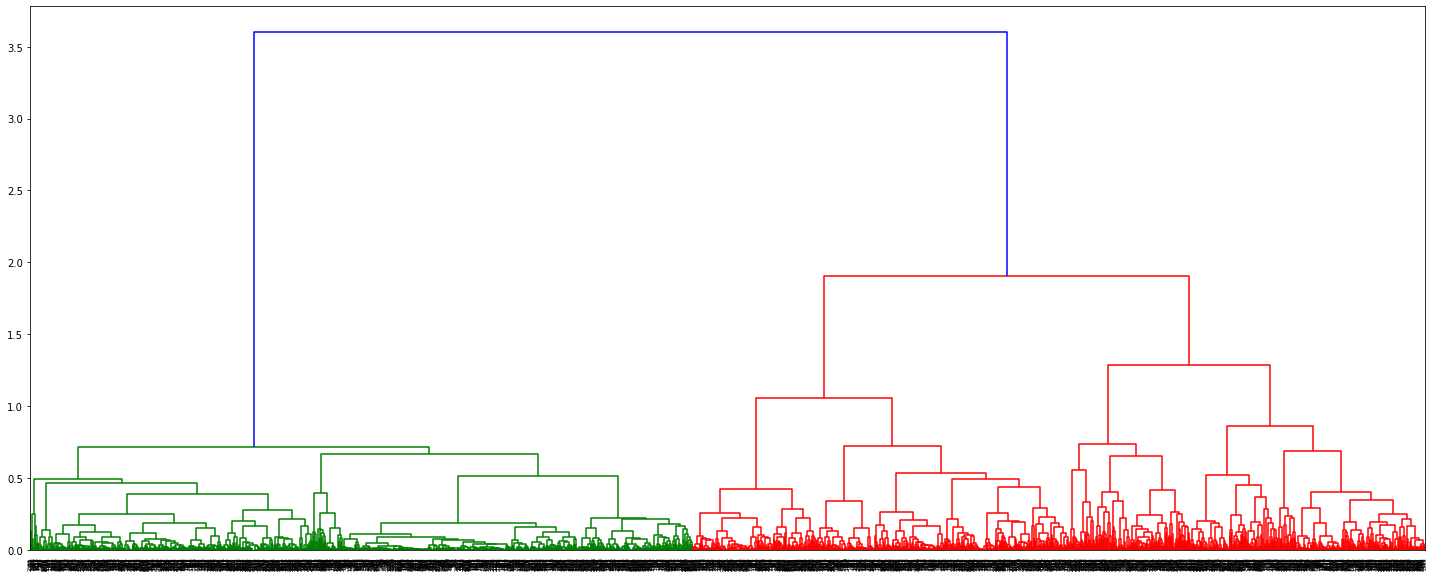

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
Z = linkage(squareform(hamming_matrix, force='tovector'), method = 'ward')


In [ ]:
dnd = dendrogram(Z, show_leaf_counts = True)
plt.show()
# quanti composti ci sono nei cluster principali
# aggiungere linea orizzontale
# tenere dei cluster

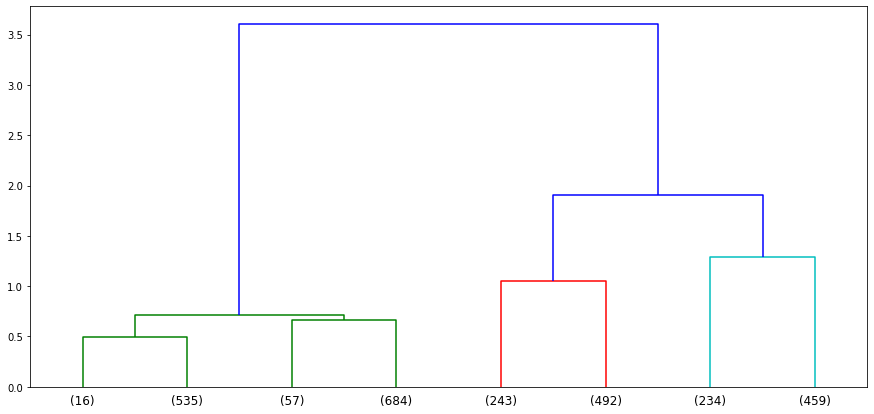

In [8]:
plt.figure(figsize = (15,7))
dnd = dendrogram(Z, truncate_mode = 'level', p = 2, show_leaf_counts = True, color_threshold = 1.5)
plt.show()

I valori sotto indicano la numerosità dei cluster. Per individuare quali sono i composti che fanno parte dei cluster:

In [16]:
from scipy.cluster.hierarchy import fcluster
# contiene l'assegnazione dei composti ai cluster
# per avere più cluster bisogna abbassare la soglia
cl = fcluster(Z, t = 1.5, criterion = 'distance')

In [23]:
sm_pub = pbc[pbc.pubchem2d.isnull() == False]
sm_pub

,cas,smiles,pubchem2d
0,10108-64-2,[Cl-].[Cl-].[Cd++],0000000000000000000000000000000000000110000000...
1,88-30-2,Oc1ccc(c(c1)C(F)(F)F)[N+]([O-])=O,1000000001100010001100011000000000000000000000...
2,1397-94-0,CCCCCC[C@@H]1[C@@H](OC(=O)CC(C)C)[C@H](C)OC(=O...,1111000001111011001111000000000000000000000000...
4,540-72-7,[Na+].[S-]C#N,0000000000000010000000000010000001000000000000...
5,72-43-5,COc1ccc(cc1)C(c2ccc(OC)cc2)C(Cl)(Cl)Cl,1100000001111000001100000000000000000110000000...
...,...,...,...
3195,103-05-9,CC(C)(O)CCc1ccccc1,1110000001110000001000000000000000000000000000...
3196,14008-58-3,CCCCNC(=O)NC(=O)c1cccnc1,1100000001110011001100000000000000000000000000...
3198,52316-55-9,COC(=O)Nc1[nH]c2ccccc2n1.O[P](O)(O)=O,1100000001110011001110000000001000000000000000...
3199,499-83-2,OC(=O)c1cccc(n1)C(O)=O,1000000001100010001110000000000000000000000000...


In [29]:
sm_pub['ham_cluster'] = list(cl)

C:\Users\Simone\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
sm_pub

,cas,smiles,pubchem2d,ham_cluster
0,10108-64-2,[Cl-].[Cl-].[Cd++],0000000000000000000000000000000000000110000000...,1
1,88-30-2,Oc1ccc(c(c1)C(F)(F)F)[N+]([O-])=O,1000000001100010001100011000000000000000000000...,3
2,1397-94-0,CCCCCC[C@@H]1[C@@H](OC(=O)CC(C)C)[C@H](C)OC(=O...,1111000001111011001111000000000000000000000000...,3
4,540-72-7,[Na+].[S-]C#N,0000000000000010000000000010000001000000000000...,1
5,72-43-5,COc1ccc(cc1)C(c2ccc(OC)cc2)C(Cl)(Cl)Cl,1100000001111000001100000000000000000110000000...,2
...,...,...,...,...
3195,103-05-9,CC(C)(O)CCc1ccccc1,1110000001110000001000000000000000000000000000...,2
3196,14008-58-3,CCCCNC(=O)NC(=O)c1cccnc1,1100000001110011001100000000000000000000000000...,3
3198,52316-55-9,COC(=O)Nc1[nH]c2ccccc2n1.O[P](O)(O)=O,1100000001110011001110000000001000000000000000...,3
3199,499-83-2,OC(=O)c1cccc(n1)C(O)=O,1000000001100010001110000000000000000000000000...,3


Rifare tutto il lavoro prendendo però gli stessi composti utilizzati in Tanimoto, così si riesce a vedere se i due metodi di clustering danno gli stessi risultati. Si può usare l'adjusted rand index.

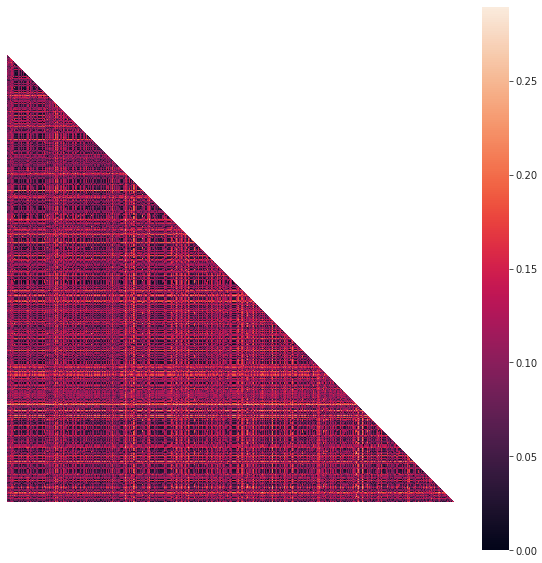

In [88]:
import seaborn as sb

mask = np.zeros_like(hamming_matrix)
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sb.heatmap(hamming_matrix, mask=mask, square=True,  xticklabels=False, yticklabels=False)

# biclustering --> non si può fare.

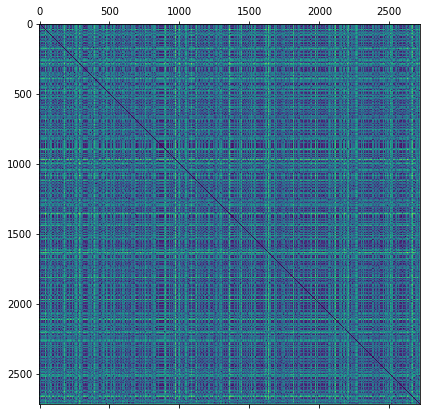

In [48]:
plt.figure(figsize=(7, 7))
plt.matshow(hamming_matrix, fignum = 0)

In [90]:
from sklearn.cluster import SpectralBiclustering
n_clusters = (3,3)

model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(hamming_matrix)

SpectralBiclustering(init='k-means++', method='log', mini_batch=False, n_best=3,
                     n_clusters=(3, 3), n_components=6, n_init=10, n_jobs=None,
                     n_svd_vecs=None, random_state=0, svd_method='randomized')

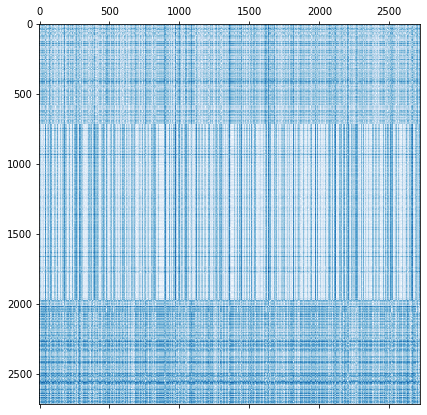

In [91]:
fit_data = hamming_matrix[np.argsort(model.row_labels_)]
plt.figure(figsize=(7, 7))
plt.matshow(fit_data, fignum= 0,  cmap=plt.cm.Blues)

In [92]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(model.row_labels_ , cl)

0.9034421421861685

I due partizionamenti sono praticamente molto simili.

### Histograms

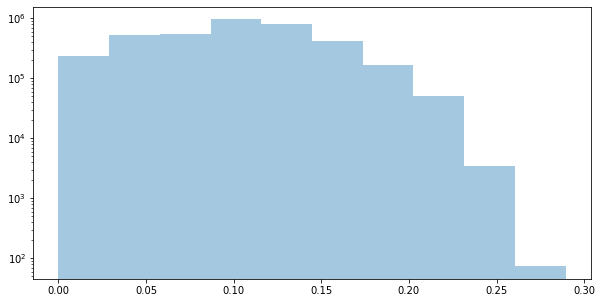

In [83]:
plt.figure(figsize = (10,5))
a = sb.distplot(squareform(hamming_matrix, force='tovector'), kde = False, bins = 10 )
a.set_yscale('log')

# Clustering (Tanimoto)

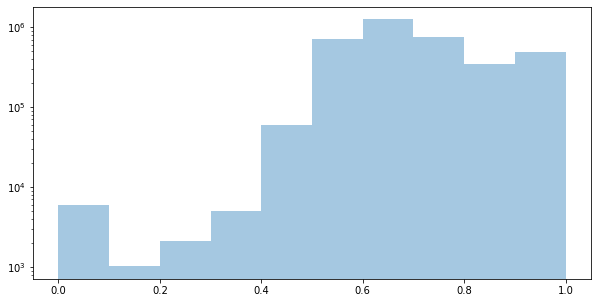

In [84]:
plt.figure(figsize = (10,5))
a = sb.distplot(squareform(tanimoto_matrix, force='tovector'), kde = False, bins = 10 )
a.set_yscale('log')

In [ ]:
# distanze molto diverse